In [243]:
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from matplotlib import pyplot as plt
from scipy.sparse import coo_matrix
import cantera as ct

# Rate equation plots

In [244]:
gas=ct.Solution("gri30.cti")
print(gas.species_names[13])
print(gas.species_names[3])
print(gas.species_names[5])
print(gas.species_names[47])

CH4
O2
H2O
N2


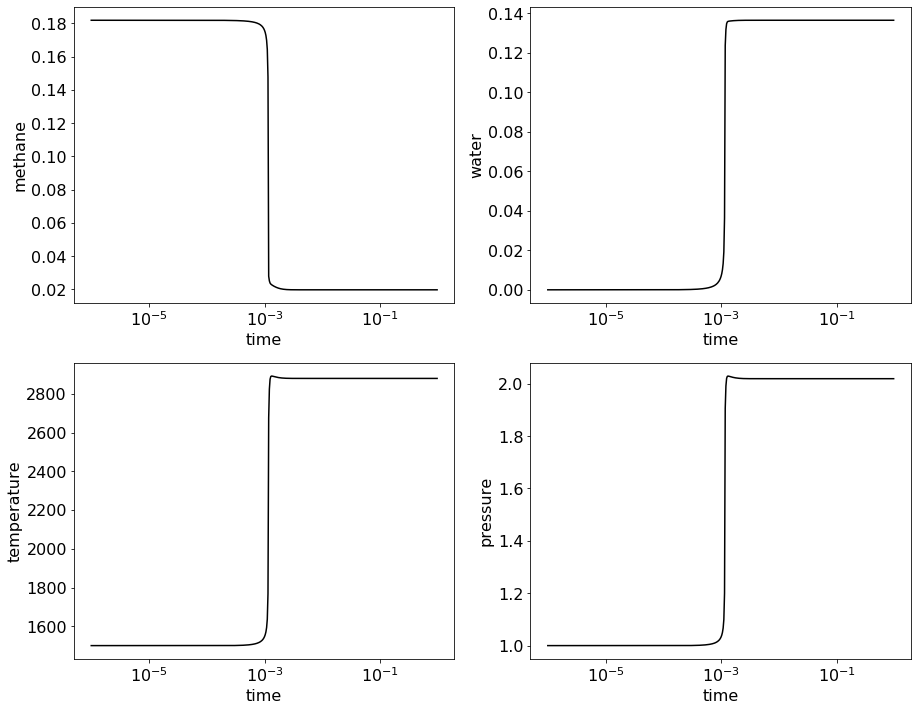

In [245]:
filebase='data/methane'
concentrations=np.load(filebase+"concentrations.npy");
times=np.load(filebase+"times.npy");
temperatures=np.load(filebase+"temperatures.npy");
pressures=np.load(filebase+"pressures.npy");
matrices=np.load(filebase+"matrices.npy")
evals=np.load(filebase+"eigenvalues.npy")
evecs=np.load(filebase+"eigenvectors.npy")
fig, ax = plt.subplots(2, 2,figsize=(15,12))
ax[0,0].semilogx(times,concentrations[:,3], "-", label="infinity", color="black")
ax[0,0].set_xlabel("time")
ax[0,0].set_ylabel("methane")
ax[0,1].semilogx(times,concentrations[:,5], "-", label="infinity", color="black")
ax[0,1].set_xlabel("time")
ax[0,1].set_ylabel("water")

ax[1,0].semilogx(times,temperatures, "-", label="infinity", color="black")
ax[1,0].set_xlabel("time")
ax[1,0].set_ylabel("temperature")
ax[1,1].semilogx(times,pressures, "-", label="infinity", color="black")
ax[1,1].set_xlabel("time")
ax[1,1].set_ylabel("pressure")
plt.savefig("griignition.pdf")

In [246]:
cmap = plt.cm.get_cmap("Reds")
cmap.set_under("white")
mean=np.mean(matrices)
for n in range(len(evals)):
    plt.matshow(matrices[n], cmap=cmap, vmin=1, vmax=mean)
    plt.xlim(0,53)
    plt.ylim(0,53)
    plt.savefig('matrix/'+str(n).zfill(4)+'.png',bbox_inches='tight')
    plt.close()

Text(0, 0.5, '$\\omega_i$')

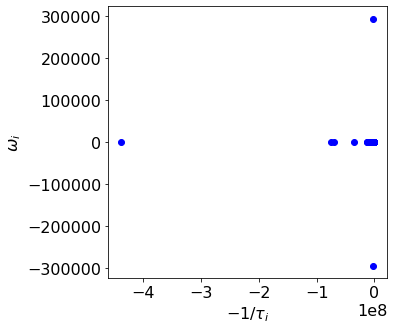

In [247]:
plt.figure(figsize=(5, 5))
plt.plot(np.real(evals[250]),np.imag(evals[250]),'bo')
plt.xlabel(r"$-1/\tau_i$")
plt.ylabel(r"$\omega_i$")

In [248]:
for n in range(len(evals)):
    plt.figure(figsize=(7, 5))
    plt.plot(np.real(evals[n]),np.imag(evals[n]),'bo')
    plt.xlim((1.1*np.min(np.real(evals)),1.1*np.max(np.real(evals))))
    plt.ylim((1.1*np.min(np.imag(evals)),1.1*np.max(np.imag(evals))))
    plt.xlabel(r"$-1/\tau_i$")
    plt.ylabel(r"$\omega_i$")
    plt.savefig('spectrum1/'+str(n).zfill(4)+'.png',bbox_inches='tight')
    plt.close()

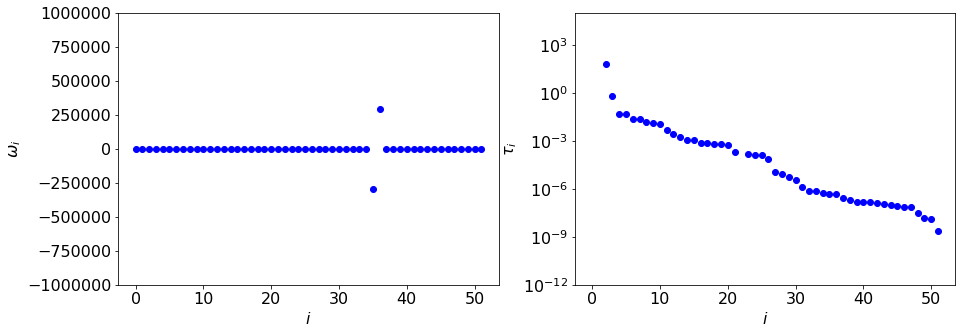

In [249]:
fig,ax=plt.subplots(1,2,figsize=(15, 5))
ax[1].semilogy(np.arange(len(evals[250,1:])),-1/np.real(evals[250,1:]), 'bo')
ax[1].set_ylim(1e-12,1e5)
ax[1].set_xlabel('$i$')
ax[1].set_ylabel(r"$\tau_i$");
ax[0].plot(np.arange(len(evals[250,1:])),np.imag(evals[250,1:]), 'bo')
ax[0].set_ylim(-1e6,1e6)
ax[0].set_xlabel('$i$')
ax[0].set_ylabel(r"$\omega_i$");

In [250]:
for n in range(len(evals)):
    fig,ax=plt.subplots(1,2,figsize=(15, 5))
    ax[1].semilogy(np.arange(len(evals[n,1:])),-1/np.real(evals[n,1:]), 'bo')
    ax[1].set_ylim(1e-12,1e5)
    ax[1].set_xlabel('$i$')
    ax[1].set_ylabel(r"$\tau_i$");
    ax[0].plot(np.arange(len(evals[n,1:])),np.imag(evals[n,1:]), 'bo')
    ax[0].set_ylim(-1e6,1e6)
    ax[0].set_xlabel('$i$')
    ax[0].set_ylabel(r"$\omega_i$");
    plt.savefig('spectrum2/'+str(n).zfill(4)+'.png')
    plt.close()

# CME runtimes

In [88]:
nums=np.arange(7)+3
nums2=np.arange(6)+3

dims=np.loadtxt('questruntime/dim.dat')
sruntimes=np.loadtxt('questruntime/sruntime.dat')
cruntimes=np.loadtxt('questruntime/cruntime.dat')
eruntimes=np.loadtxt('questruntime/eruntimes.dat')
pruntimes=np.loadtxt('questruntime/pruntime.dat')


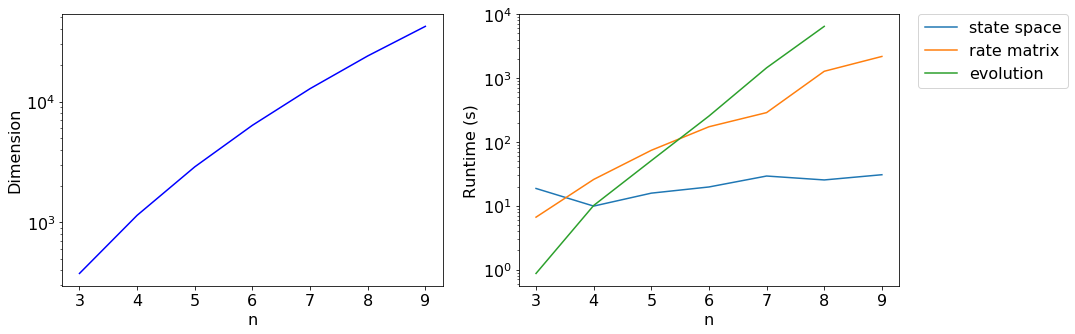

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(nums,dims, 'b-')
plt.xlabel("n")
plt.ylabel("Dimension")
plt.subplot(122)
plt.semilogy(nums,sruntimes, label="state space")
plt.semilogy(nums,cruntimes, label="rate matrix")
# plt.semilogy(nums2,eruntimes, label="eigenvales")
plt.semilogy(nums2,pruntimes, label="evolution")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.savefig("runtimes.pdf")
plt.show()


In [94]:
a,b=np.polyfit(nums2,np.log(eruntimes),1)
[[n,np.exp(b+a*n)/3600] for n in range(3,11)]

[[3, 4.4987706042990506e-05],
 [4, 0.00015967898235648745],
 [5, 0.0005667632259808491],
 [6, 0.0020116645884371044],
 [7, 0.0071401852323223275],
 [8, 0.02534331291852331],
 [9, 0.08995333997480753],
 [10, 0.3192796221487356]]

# CME concentrations and thermo

In [96]:
filebase="data/h2o2/3/"
propogate=np.load(filebase+"propogate.npy")
temperatures=np.load(filebase+"temperatures.npy")
pressures=np.load(filebase+"pressures.npy")
times=np.load(filebase+"times.npy")
multiindices=np.load(filebase+"multiindices.npy")

spatoms=np.load(filebase+"spatoms.npy")

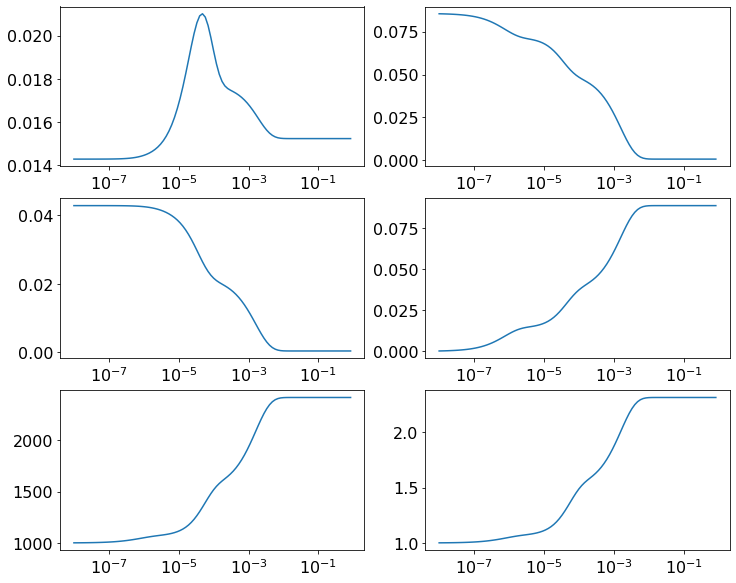

In [98]:
plt.figure(figsize=(12, 10))
plt.subplot(321)

plt.semilogx(times,np.sum(propogate.dot(np.diag((multiindices[:,1]+multiindices[:,2]+multiindices[:,4]+multiindices[:,6])/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(322)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,0]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(323)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,3]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(324)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,5])/np.sum(multiindices,axis=1)),axis=1))
plt.subplot(325)
plt.semilogx(times,np.sum(propogate.dot(np.diag(temperatures)),axis=1))
plt.subplot(326)
plt.semilogx(times,np.sum(propogate.dot(np.diag(pressures)),axis=1))
plt.show()

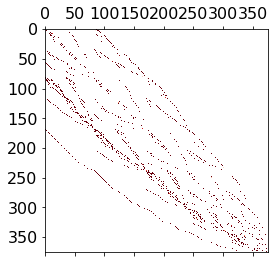

In [122]:
dim=len(multiindices)
rows=np.load(filebase+"rows.npy")
columns=np.load(filebase+"columns.npy")
data=np.load(filebase+"data.npy")
ratematrix=coo_matrix((np.array(data),(np.array(rows),np.array(columns))),(int(dim),int(dim)))
cmap = plt.cm.get_cmap("Reds")
cmap.set_under("white")
scale=np.mean(np.abs(ratematrix.toarray()[np.where(ratematrix.toarray()!=0)]))/1e6
plt.matshow(ratematrix.toarray(), vmin=1, vmax=scale, cmap=cmap)

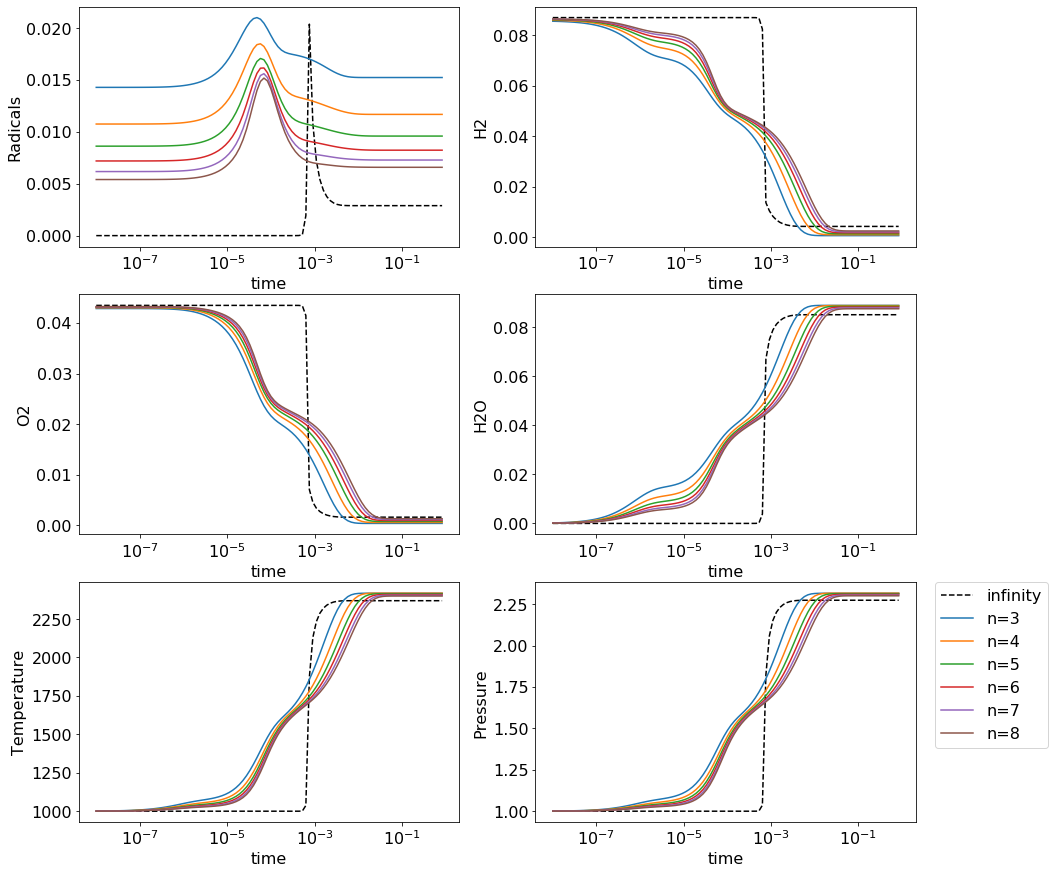

In [127]:
fig, ax = plt.subplots(3, 2,figsize=(15, 15))
concentrations=np.load("data/h2o2concentrations.npy");
times2=np.load("data/h2o2times.npy");
temperatures2=np.load("data/h2o2temperatures.npy");
pressures2=np.load("data/h2o2pressures.npy");

ax[0,0].set_xlabel("time")
ax[0,1].set_xlabel("time")
ax[1,0].set_xlabel("time")
ax[1,1].set_xlabel("time")
ax[2,0].set_xlabel("time")
ax[2,1].set_xlabel("time")

ax[0,0].set_ylabel("Radicals")
ax[0,1].set_ylabel("H2")
ax[1,0].set_ylabel("O2")
ax[1,1].set_ylabel("H2O")
ax[2,0].set_ylabel("Temperature")
ax[2,1].set_ylabel("Pressure")


ax[0,0].semilogx(times2,concentrations[:,1]+concentrations[:,2]+concentrations[:,4]+concentrations[:,6], "--", label="infinity", color="black")
ax[0,1].semilogx(times2,concentrations[:,0], "--", label="infinity", color="black")
ax[1,0].semilogx(times2,concentrations[:,3], "--", label="infinity", color="black")
ax[1,1].semilogx(times2,concentrations[:,5], "--", label="infinity", color="black")
ax[2,0].semilogx(times2,temperatures2, "--", label="infinity", color="black")
ax[2,1].semilogx(times2,pressures2, "--", label="infinity", color="black")


for n in range(3,9):
    filebase="data/h2o2/"+str(n)+"/"
    propogate=np.load(filebase+"propogate.npy")
    temperatures=np.load(filebase+"temperatures.npy")
    pressures=np.load(filebase+"pressures.npy")
    times=np.load(filebase+"times.npy")
    multiindices=np.load(filebase+"multiindices.npy")
    spatoms=np.load(filebase+"spatoms.npy")
    ax[0,0].semilogx(times,np.sum(propogate.dot(np.diag((multiindices[:,1]+multiindices[:,2]+multiindices[:,4]+multiindices[:,6])/np.sum(multiindices,axis=1))),axis=1),label="n="+str(n))
    ax[0,1].semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,0]/np.sum(multiindices,axis=1))),axis=1),label="n="+str(n))
    ax[1,0].semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,3]/np.sum(multiindices,axis=1))),axis=1),label="n="+str(n))
    ax[1,1].semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,5])/np.sum(multiindices,axis=1)),axis=1),label="n="+str(n))
    ax[2,0].semilogx(times,np.sum(propogate.dot(np.diag(temperatures)),axis=1),label="n="+str(n))
    ax[2,1].semilogx(times,np.sum(propogate.dot(np.diag(pressures)),axis=1),label="n="+str(n))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig("plots.pdf")